### Importar librerías

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importar Datasets

In [170]:
df_train = pd.read_csv('house_train_raw.csv')
df_test = pd.read_csv('houses_test_raw.csv')

## Análisis exploratorio

In [171]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [172]:
df_train.duplicated().sum()
#No hay duplicados

0

In [173]:
df_train.info()
#Hay valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
#Valores faltantes:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

---  
## Regresión linear usando sólo los features con una correlación con respecto al target(SalePrice) mayor a 0.5

In [175]:
#Features con mayor correlación con respecto al target(SalePrice)
df_train.corr()["SalePrice"][df_train.corr().SalePrice > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [176]:
#Features con mayor correlación con respecto al target(SalePrice)
features = df_train.corr()["SalePrice"][df_train.corr().SalePrice > 0.5].index.values
df_corr = df_train[features]
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


<AxesSubplot:>

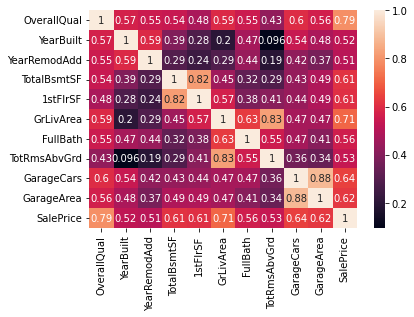

In [177]:
#Correlación entre features
sns.heatmap(df_corr.corr(), annot=True)

## Graficas para verificar dicha correlación

### Relación entre OverallQual y SalePrice:

In [178]:
# OverallQual: Rates the overall material and finish of the house
px.box(df_train, x="OverallQual", y="SalePrice", color="OverallQual",title="Relación entre OverallQual y SalePrice")

Encontramos que efectivamente el OverallQual influye en el précio de las casas. Parece que tenemos pocos outliers

### Relación entre YearBuilt y SalePrice:

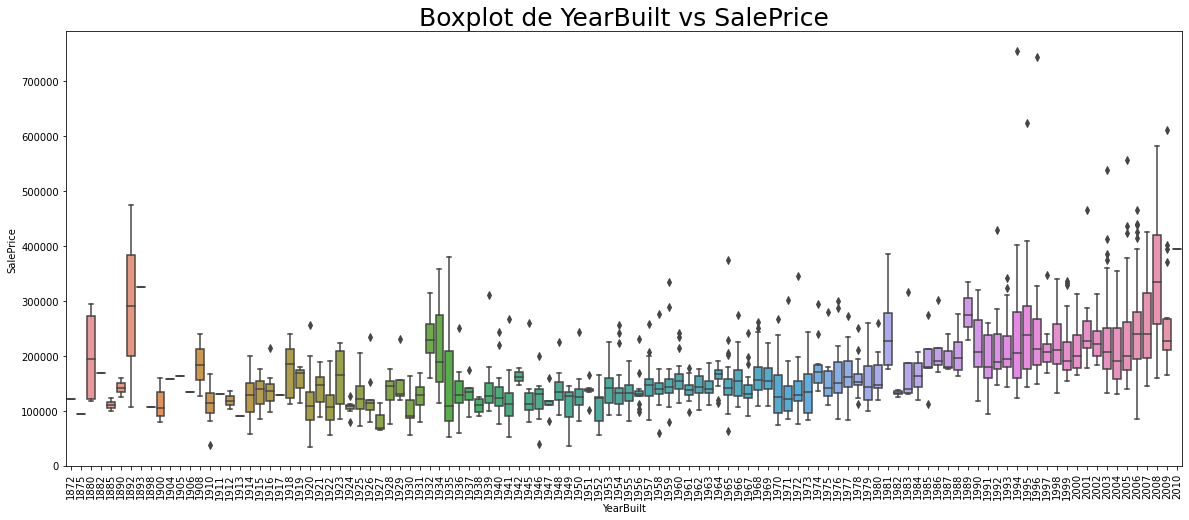

In [179]:
#YearBuilt: Original construction date
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.title("Boxplot de YearBuilt vs SalePrice", fontsize=25)
plt.show()

La relación se ve pero no es tan fuerte y existen muchos outliers

### Relación entre YearRemodAdd y SalePrice:

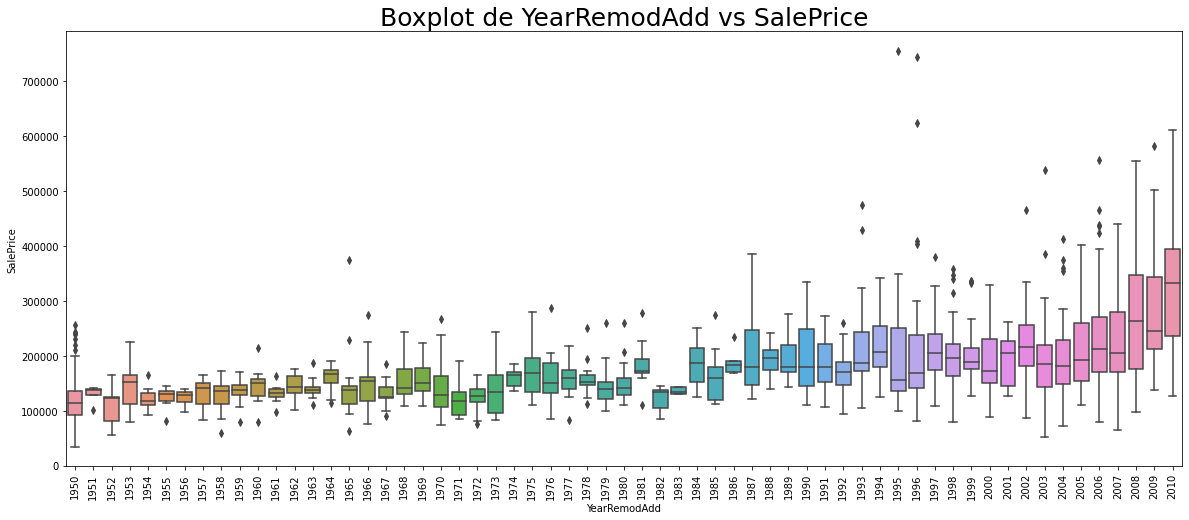

In [180]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.title("Boxplot de YearRemodAdd vs SalePrice", fontsize=25)
plt.show()

Se ve una relación pero no es tan fuerte, además presenta bastantes outliers

### Relación entre TotalBsmtSF y SalePrice:

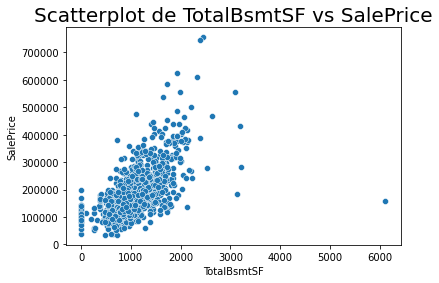

In [181]:
#TotalBsmtSF: Total square feet of basement area
sns.scatterplot(y="SalePrice", x="TotalBsmtSF", data=df_train)
plt.title("Scatterplot de TotalBsmtSF vs SalePrice", fontsize=20)
plt.show()

Existe la relación. Existen outliers

### Relación entre 1stFlrSF y SalePrice

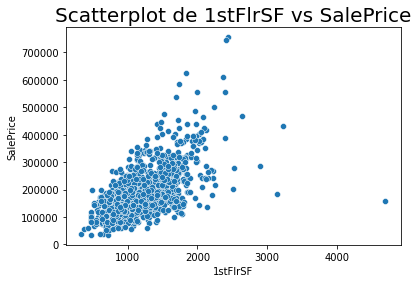

In [182]:
#1stFlrSF: First Floor square feet
sns.scatterplot(y="SalePrice", x="1stFlrSF", data=df_train)
plt.title("Scatterplot de 1stFlrSF vs SalePrice", fontsize=20)
plt.show()

Existe la relación. Existen outliers

### Relación entre GrLivArea y SalePrice:

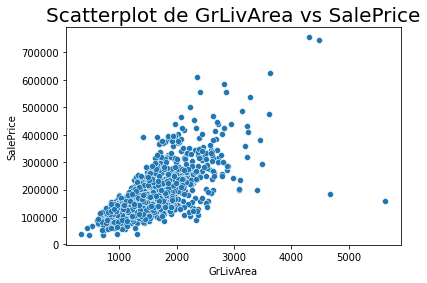

In [183]:
#GrLivArea: Above grade (ground) living area square feet
sns.scatterplot(y="SalePrice", x="GrLivArea", data=df_train)
plt.title("Scatterplot de GrLivArea vs SalePrice", fontsize=20)
plt.show()

Existe la relación. Existen outliers

### Relación entre FullBath y SalePrice

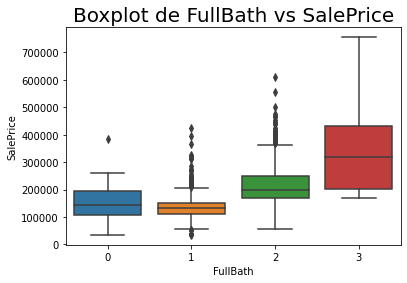

In [184]:
#FullBath: Full bathrooms above grade
sns.boxplot(y="SalePrice", x="FullBath", data=df_train)
plt.title("Boxplot de FullBath vs SalePrice", fontsize=20)
plt.show()

Existe la relación. Existen outliers

### Relación entre GarageCars y SalePrice

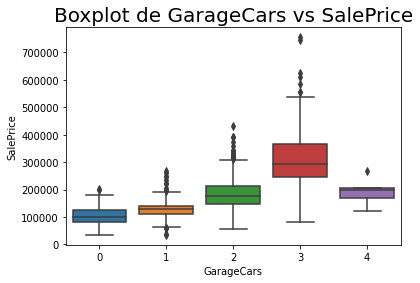

In [185]:
#GarageCars: Size of garage in car capacity
sns.boxplot(y="SalePrice", x="GarageCars", data=df_train)
plt.title("Boxplot de GarageCars vs SalePrice", fontsize=20)
plt.show()

Existe una relación. Para el caso de GarageCars=4 existe una anomalía

### Relación entre GarageArea y salePrice:

In [186]:
#GarageArea: Size of garage in square feet
px.scatter(df_train,y="SalePrice", x="GarageArea", color="GarageArea", title="Scatterplot de GarageArea vs SalePrice")

##### Existe la relación. Existen outliers

### Relación entre TotRmsAbvGrd y SalePrice:

In [187]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
px.box(df_train,y="SalePrice", x="TotRmsAbvGrd", color="TotRmsAbvGrd", title="Boxplot de TotRmsAbvGrd vs SalePrice")

##### Existe la relación. Hay una anomalía para el caso de TotRmsAbvGrd=14

# Manejo de outliers:

Función para detectar outliers:

In [188]:
def detectar_outliers(df:pd.DataFrame,columna:str,tecnica='cajas') -> pd.DataFrame:

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)


    df['Outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

Añado feature que identifica outliers (0 = outlier, 1 != outlier):

In [189]:
df_corr['Outlier'] = 1
for col in df_corr.columns:
    if col != 'Outlier':
        df_corr = detectar_outliers(df_corr,col,'cajas')

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\2687720227.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\928377547.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\928377547.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel 

In [190]:
df_corr.sample(10)

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
1378            6       1973          1973          483       483        987   
303             5       1972          1972          894       894        894   
741             6       1961          1996          912       912        912   
184             5       1908          1991          504       936       1252   
398             5       1920          1950          961      1077       1077   
173             6       1961          1961         1362      1362       1362   
915             4       1970          1970          546       546       1092   
1157            7       2007          2008         1314      1314       1314   
679             5       1961          1961          988       988        988   
421             6       1977          2000         1602      1602       1602   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  Outlier  
1378         1             5           1         264      83000        1  
303          1             5           2         552     149900        1  
741          1             5           1         288     142000        1  
184          1             5           2         576     127000        1  
398          1             6           1         338      67000        1  
173          1             6           2         504     163000        1  
915          1             6           1         286      75000        1  
1157         2             6           2         626     230000        1  
679          1             5           2         572     128500        1  
421          2             8           2         529     215000        1

In [191]:
df_corr['Outlier'].value_counts()

1    1305
0     155
Name: Outlier, dtype: int64

Son pocos los outliers (155/1460), así que los descartaré para la creación del modelo de ML

## Creación del modelo:

Defino los datos con los que voy a entrenar el modelo(X) y el valor a predecir/target(Y):

In [192]:
df_ml = df_corr[df_corr.Outlier != 0].drop(columns=['Outlier'])
X = df_ml.drop(["SalePrice"], axis=1).values
Y = df_ml["SalePrice"].values

Escalado de features:

In [193]:
# from sklearn.preprocessing import MinMaxScaler
# mmc=MinMaxScaler()
# scaled_x=mmc.fit_transform(X)

Divido los datos entre los que usaré para entrenar y los que usaré para testear (para este caso los dividí entre 0.8 train y 0.2 test):

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## LinearRegression:

importo el modelo:

In [195]:
from sklearn.linear_model import LinearRegression

Entreno el modelo:

In [196]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Hago la predicción con los datos de testeo:

In [197]:
y_pred = lr.predict(x_test)
print(y_pred)

[110087.89004786 204515.55552673 209049.2057733  163265.51632353
  67809.33047375 214114.6753409  155199.86405634 157006.53567382
  98531.00573441 222123.37828295 162647.94421018 194914.23324812
 149375.6366383  193981.64296799 189777.11141005 125718.78705579
 207195.45291907 172190.80353479 162527.71943117 173192.40430222
 129990.26875725  72357.96547769 247927.36395182 181658.4146246
 224835.12966989 150006.46612857  47686.82854258 161505.73672221
 234352.23057317 127266.14557635 238202.01515247 208426.7163774
 142422.52601439 178368.68676882 164796.95082968 194146.22395452
 189535.90961752 223790.37956919 119913.86739011 198722.02394385
 162698.94593591 103333.42041639 148908.68839672 161821.30696628
 129742.00596919 122577.72073315 248876.38480896 135095.89607172
 119893.27704678 115894.4217696  167641.93271722 174407.18388565
 141110.56576876 164869.17032643 189302.28258645 133495.00262046
 105611.96763841 208714.56869391 148311.83166763 188736.66934548
 111200.59630289 107118.513

Comparo los valores predichos con los valores de testeo:

In [198]:
df_comparacion_predicciones = pd.DataFrame({'y_test':y_test, 'y_pred':np.round(y_pred,2),'Diferencia':np.round(y_test-y_pred,2)})
df_comparacion_predicciones.sample(20)

y_test     y_pred  Diferencia
16   280000  207195.45    72804.55
29   131400  127266.15     4133.85
49   118500  115894.42     2605.58
65   160000  181052.69   -21052.69
144  118000  108045.17     9954.83
60   115000  111200.60     3799.40
50   160000  167641.93    -7641.93
39   164990  198722.02   -33732.02
33   173000  178368.69    -5368.69
250  137500  140912.33    -3412.33
93   110000   90314.32    19685.68
95    79000   98878.13   -19878.13
232   73000  106220.21   -33220.21
214  145000  149468.82    -4468.82
150  287090  253814.59    33275.41
84   165600  166070.76     -470.76
173  135000  117114.44    17885.56
260  119500  122167.55    -2667.55
162  105000   91137.85    13862.15
98   265000  263662.82     1337.18

Score del root mean squared log error (RMSLE) usando LinearRegression:

In [199]:
print("LinearRegression RMSLE Score: " + str(mean_squared_log_error(y_test, y_pred, squared=False)))

LinearRegression RMSLE Score: 0.15675750564468524


Puntaje del R cuadrado:

In [200]:
print("R2: " + str(r2_score(y_test,y_pred)))

R2: 0.8100027376275014


Grafica entre el target de testeo y el target predicho (y_test & y_pred):

In [201]:
px.scatter(df_comparacion_predicciones,y="y_test", x="y_pred", title="Scatterplot de y_test vs y_pred (LinearRegression)")

---
# Random Forest Regressor:

Importo el modelo:

In [202]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()

Entreno el modelo y hago la predicción:

In [203]:
rfr.fit(x_train,y_train) 
y_rfr_pred= rfr.predict(x_test)

Comparo los valores reales con los predichos con RandomForestRegressor:

In [204]:
df_comparacion_predicciones = pd.DataFrame({'y_test':y_test, 'y_rfr_pred':np.round(y_rfr_pred,2),'Diferencia':np.round(y_test-y_rfr_pred,2)})
df_comparacion_predicciones.head(20)

y_test  y_rfr_pred  Diferencia
0   108000   141504.00   -33504.00
1   311500   204903.70   106596.30
2   207500   172593.40    34906.60
3   139000   153441.70   -14441.70
4    81000    79313.11     1686.89
5   214900   205876.70     9023.30
6   143000   142329.95      670.05
7   159500   154967.98     4532.02
8   129900   110411.55    19488.45
9   236000   235012.60      987.40
10  173000   163213.36     9786.64
11   82500   179806.10   -97306.10
12  146500   153938.00    -7438.00
13  178000   191614.50   -13614.50
14  208300   175298.33    33001.67
15   89471   120973.24   -31502.24
16  280000   239936.00    40064.00
17  165500   145470.55    20029.45
18  143900   147777.55    -3877.55
19  194000   164159.24    29840.76

Score del root mean squared log error (RMSLE) usando RandomForestRegressor:

In [205]:
print("RMSLE: " + str(mean_squared_log_error(y_test, y_rfr_pred, squared=False)))

RMSLE: 0.15659743888318894


Puntaje del R2:

In [206]:
print("R2: " + str(r2_score(y_test,y_rfr_pred)))

R2: 0.8005703906754403


Grafica entre el target de testeo y el target predicho (y_test & y_pred):

In [207]:
px.scatter(df_comparacion_predicciones,y="y_test", x="y_rfr_pred", title="Scatterplot de y_test vs y_rfr_pred (RamdonForestRegressor)")

---
## Prediciendo el precio para los datos del archivo houses_test_raw.csv (Usando RamdonForestRegressor)

Ajusto el dataset para usar únicamente los features que usé para entrenar el modelo:

In [221]:
features2 = np.delete(features,-1)
df_test2 = df_test[features2]
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1458 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


Manejo de valores faltantes:

In [210]:
df_test2.fillna(df_test2.mean(), inplace=True)

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\2408755943.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Hago algunas transformaciones para poder hacer la predicción:

In [211]:
#Transormar tipos de datos de float a int
df_test2["TotalBsmtSF"] = df_test2["TotalBsmtSF"].astype(int)
df_test2["GarageCars"] = df_test2["GarageCars"].astype(int)
df_test2["GarageArea"] = df_test2["GarageArea"].astype(int)
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1459 non-null   int64
 1   YearBuilt     1459 non-null   int64
 2   YearRemodAdd  1459 non-null   int64
 3   TotalBsmtSF   1459 non-null   int32
 4   1stFlrSF      1459 non-null   int64
 5   GrLivArea     1459 non-null   int64
 6   FullBath      1459 non-null   int64
 7   TotRmsAbvGrd  1459 non-null   int64
 8   GarageCars    1459 non-null   int32
 9   GarageArea    1459 non-null   int32
dtypes: int32(3), int64(7)
memory usage: 97.0 KB


C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\3648930399.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\3648930399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_17848\3648930399.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Hago la predicción con el modelo RamdonForestRegressor:

In [219]:
pred_test = rfr.predict(df_test2)
pred_test

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([118145.81, 149708.  , 177201.  , ..., 143914.87, 107646.5 ,
       237478.75])

Genero el archivo 'pred_test.csv':

In [220]:
df_pred_test = pd.Series(pred_test)
df_pred_test.to_csv("pred_test.csv")
df_pred_test

0       118145.810000
1       149708.000000
2       177201.000000
3       181212.000000
4       213322.360000
            ...      
1454     84337.453810
1455     84026.739524
1456    143914.870000
1457    107646.500000
1458    237478.750000
Length: 1459, dtype: float64

Referencias:  
[Advanced House Price Prediction](https://www.kaggle.com/code/asmithars/advanced-house-price-prediction)  
[How to do Multiple Linear Regression in Python| Jupyter Notebook|Sklearn](https://www.youtube.com/watch?v=WngoqVB6cXw)  
[Machine Learning with Scikit-Learn Python | RMSE, MAE, RMSLE, adj R2 and more](https://www.youtube.com/watch?v=gofilGC-vMk)
